In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load datas

In [3]:
df_same = pd.read_csv('../final_data/res_same_beta.csv')
df_diff = pd.read_csv('../final_data/res_diff_beta.csv')

In [4]:
#Convert into int if digit
def convert_into_digit(df):
    df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)
    return df

def sep_data(df): 
    lc_df = df[~(df['Iteration']=='last 100 iterations mean')]
    fin_df = df[df['Iteration']=='last 100 iterations mean']
    return lc_df, fin_df
    

In [5]:
df_same = convert_into_digit(df_same)
df_diff = convert_into_digit(df_diff)

In [6]:
lc_df_same, fin_df_same = sep_data(df_same)
lc_df_diff, fin_df_diff = sep_data(df_diff)

## Useful fct

In [7]:
def plot_learning_curve(lc_df, nb_iter, beta):
    mean_df = lc_df[lc_df['beta']==beta].groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward1'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward2'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 2')

    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')

    # Customize the plot
    plt.title(f'Learning Curves for $\\beta$={beta}')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

    
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    print(df_beta_sorted['beta'].unique())
      # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()


## Prob of choose a random action

In [7]:
df_same['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-06,
       1.0e-03, 5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04,
       2.5e-06, 2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [8]:
sorted([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 1.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

[1e-07,
 2.5e-07,
 5e-07,
 7.5e-07,
 1e-06,
 2.5e-06,
 5e-06,
 7.5e-06,
 1e-05,
 2.5e-05,
 5e-05,
 7.5e-05,
 0.0001,
 0.00025,
 0.0005,
 0.00075,
 0.001,
 0.0025,
 0.005,
 0.0075]

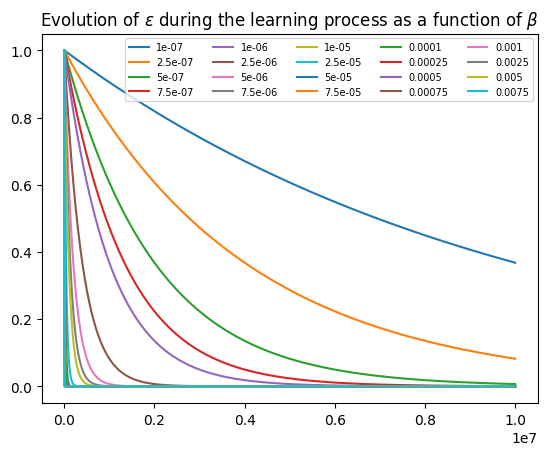

In [9]:
for beta in sorted([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 1.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05]):
    t = np.linspace(0,10**(7),1000)
    plt.plot(t, np.exp(-beta*t), label=beta)
    plt.title('Evolution of $\\epsilon$ during the learning process as a function of $\\beta$')
    plt.legend(fontsize=7, ncol = 5)

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_913/2545839581.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, np.log(np.exp(-beta*t)/np.exp(-1.0e-05*t)), label=f"exp(-{beta}*t)/exp(-1.0e-05*t)")


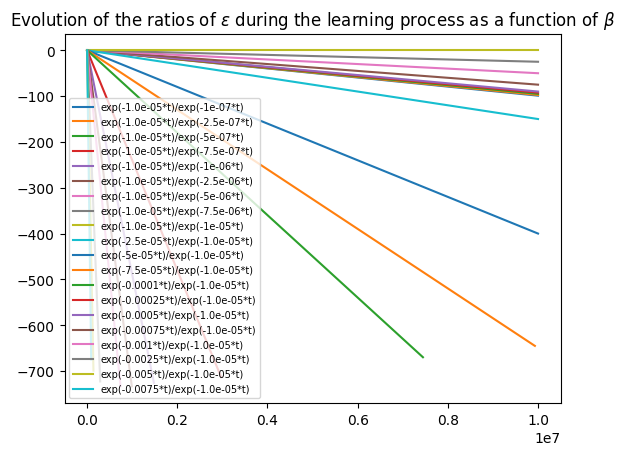

In [2]:
for beta in sorted([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 1.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05]):
    t = np.linspace(0,10**(7),1000)
    if beta > 1.0e-05:
        plt.plot(t, np.log(np.exp(-beta*t)/np.exp(-1.0e-05*t)), label=f"exp(-{beta}*t)/exp(-1.0e-05*t)")
    else: 
        plt.plot(t, np.log(np.exp(-1.0e-05*t)/np.exp(-beta*t)), label=f"exp(-1.0e-05*t)/exp(-{beta}*t)")
    plt.title('Evolution of the log-ratios of $\\epsilon$ during the learning process as a function of $\\beta$')
    plt.legend(fontsize=7, ncol = 1)

## Learing curves

In [11]:
sorted(df_same['beta'].unique())

[1e-07,
 2.5e-07,
 5e-07,
 7.5e-07,
 1e-06,
 2.5e-06,
 5e-06,
 7.499999999999999e-06,
 1e-05,
 2.5e-05,
 5e-05,
 7.500000000000001e-05,
 0.0001,
 0.00025,
 0.0005,
 0.00075,
 0.001,
 0.0025,
 0.005,
 0.0075]

In [133]:
def plot_learning_curves_subplots(lc_df, nb_iter, betas, nrows, ncols, figh=20, figl=20, loc_leg=(0.8, 0.96),y=1, title='Learning Curves for Different $\\beta$ Values'):
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figl, figh))
    fig.suptitle(title, fontsize=30,y=y)

    # Flatten the axes for easier indexing
    axes = axes.flatten()

    for i, beta in enumerate(betas):
        # Filter data for the specific beta
        mean_df = lc_df[lc_df['beta'] == beta].groupby('Iteration')[['Reward1', 'Reward2']].mean().reset_index()

        # Plot rewards for each player
        axes[i].plot(mean_df['Iteration'][mean_df['Iteration'] < nb_iter], mean_df['Reward1'][mean_df['Iteration'] < nb_iter],
                     alpha=0.5, label='Player 1')
        axes[i].plot(mean_df['Iteration'][mean_df['Iteration'] < nb_iter], mean_df['Reward2'][mean_df['Iteration'] < nb_iter],
                     alpha=0.5, label='Player 2')

        # Add horizontal lines for Collusion Profits and Nash Profits
        axes[i].axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
        axes[i].axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')

        # Customize the plot
        axes[i].set_title(f"$\\beta$={'{:.1e}'.format(beta)}", size=20)
        axes[i].set_xlabel('Iteration', fontsize=20)
        axes[i].set_ylabel('Rewards', fontsize=20)
        axes[i].xaxis.set_tick_params(labelsize=20)
        axes[i].xaxis.get_offset_text().set_fontsize(20)
        axes[i].yaxis.set_tick_params(labelsize=20)
        axes[i].grid(True)

    # Adjust layout for subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96])


    # Create a combined legend using the axes of the last subplot
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=loc_leg,fancybox=True, shadow=True, ncol=4, fontsize=20)
   

    plt.show()

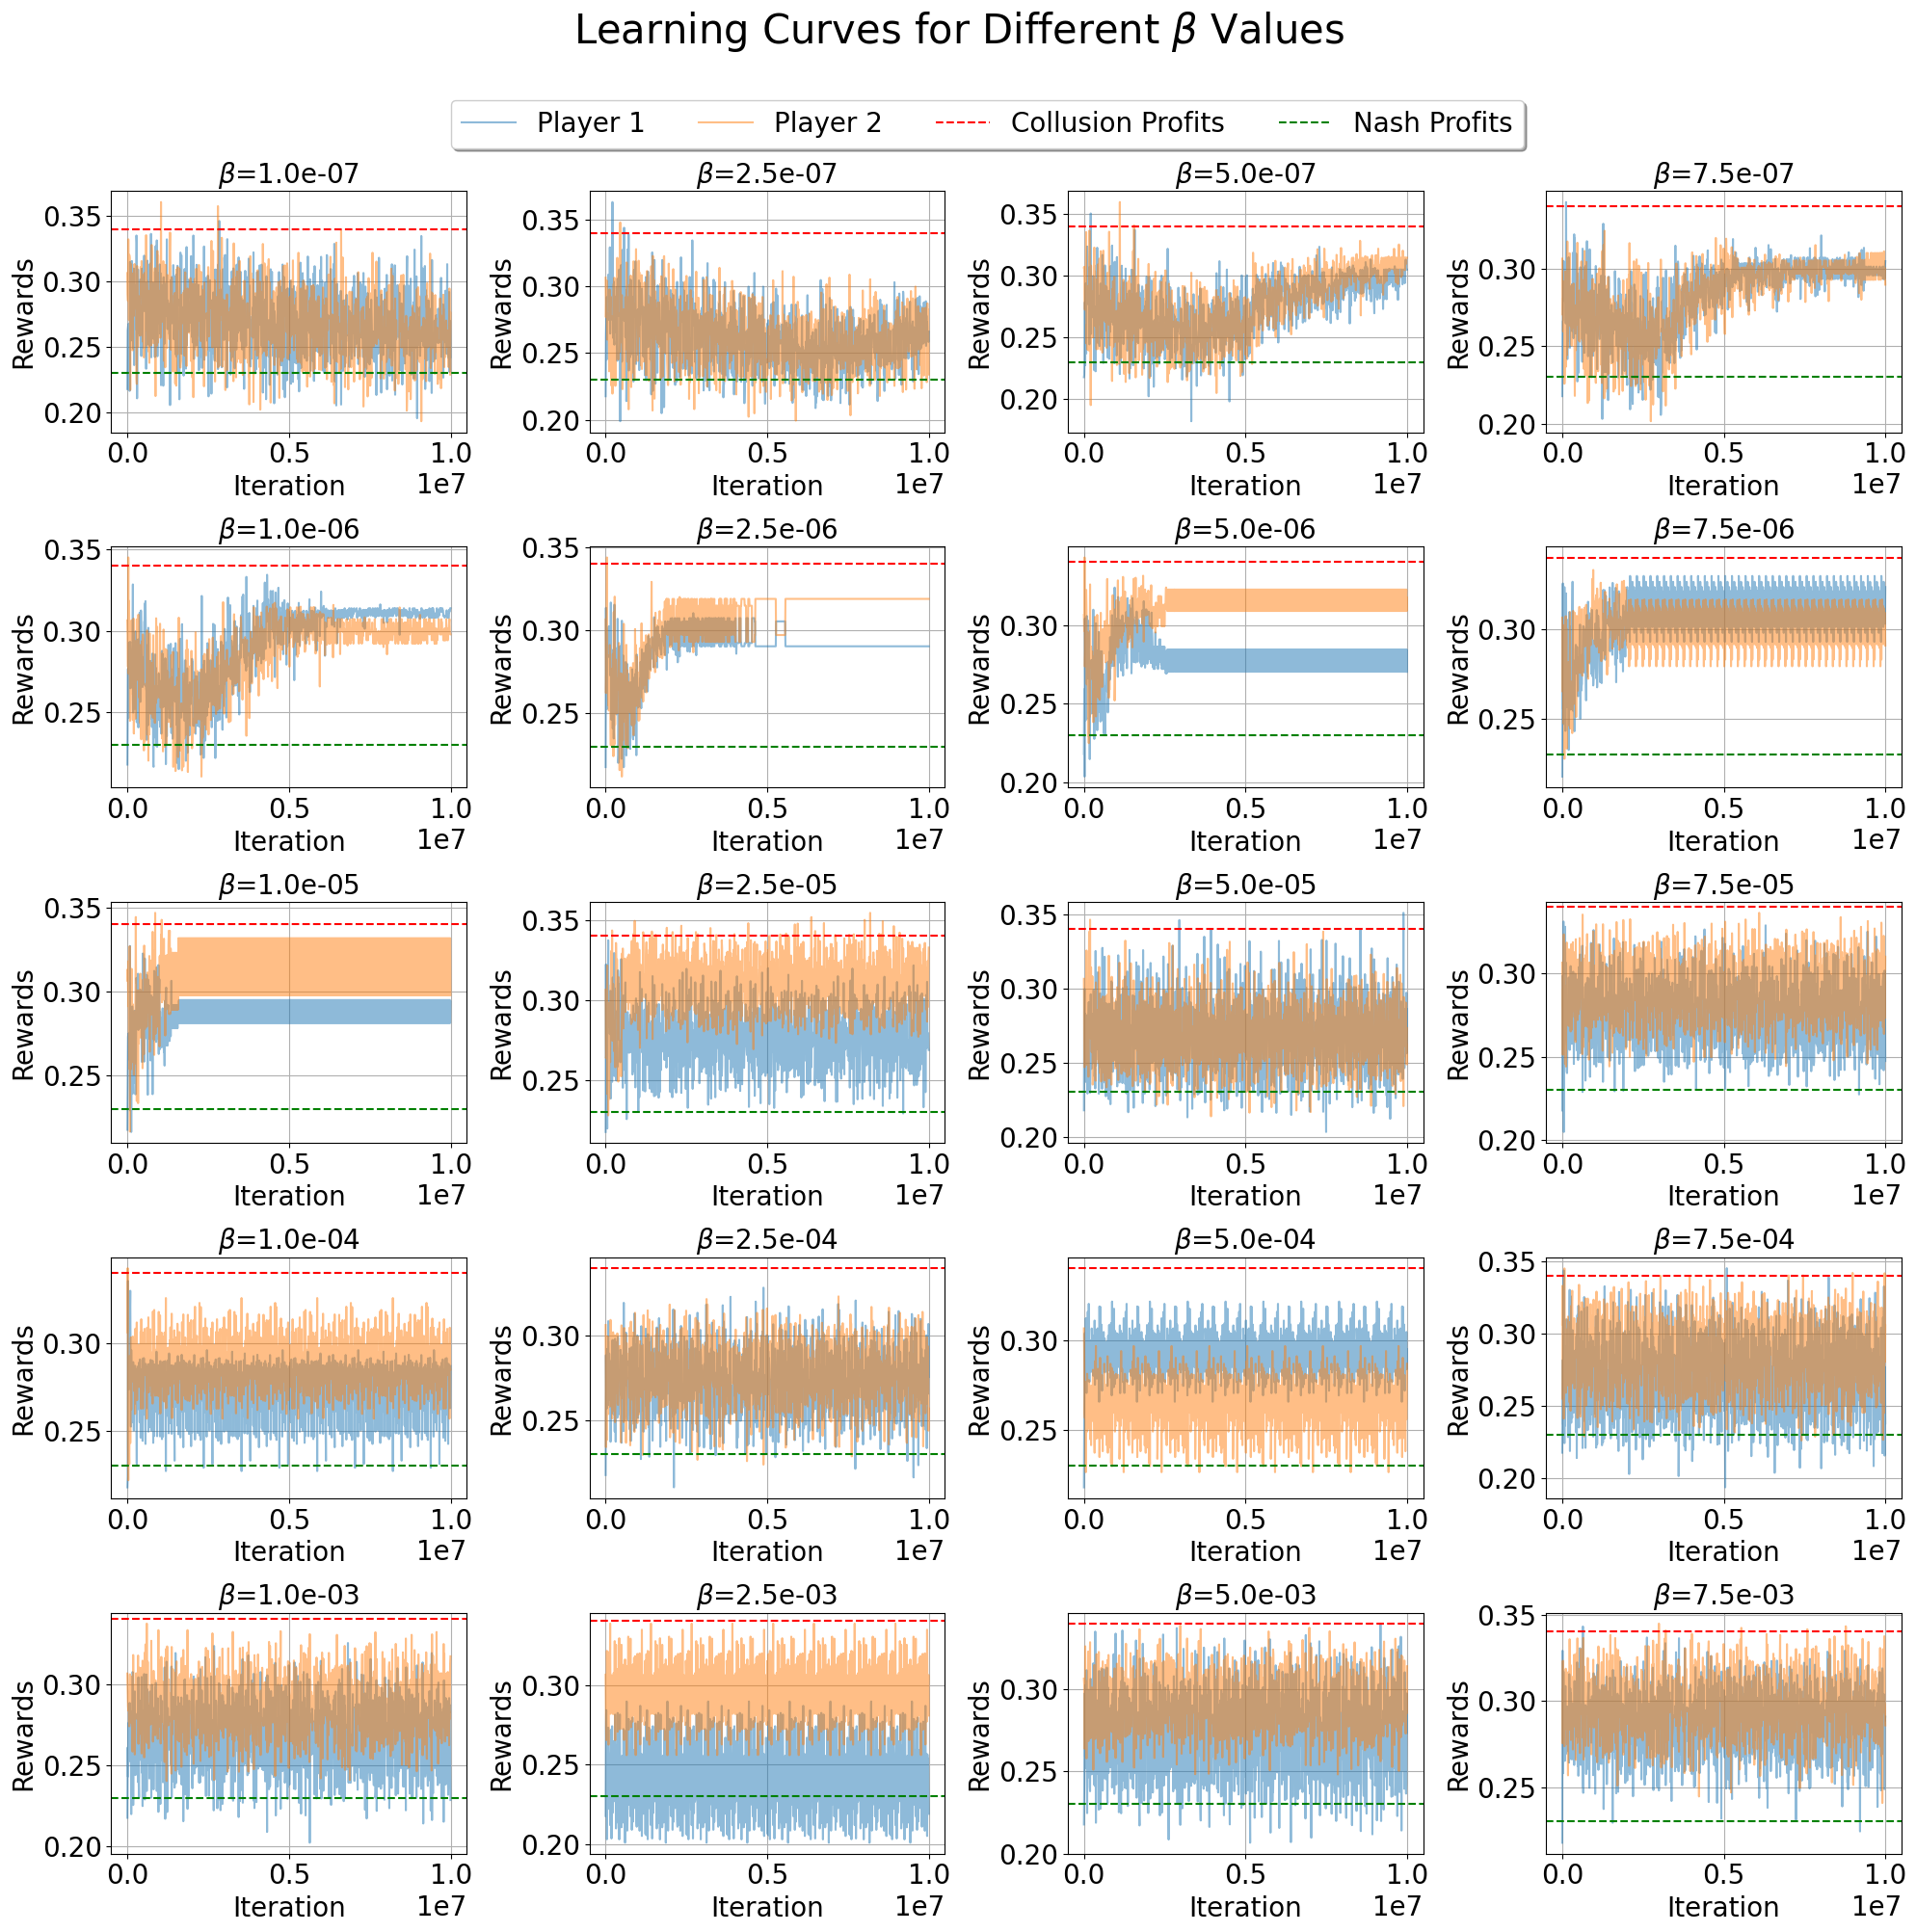

In [137]:
plot_learning_curves_subplots(lc_df_same,10**7,sorted(df_same['beta'].unique()),5,4)

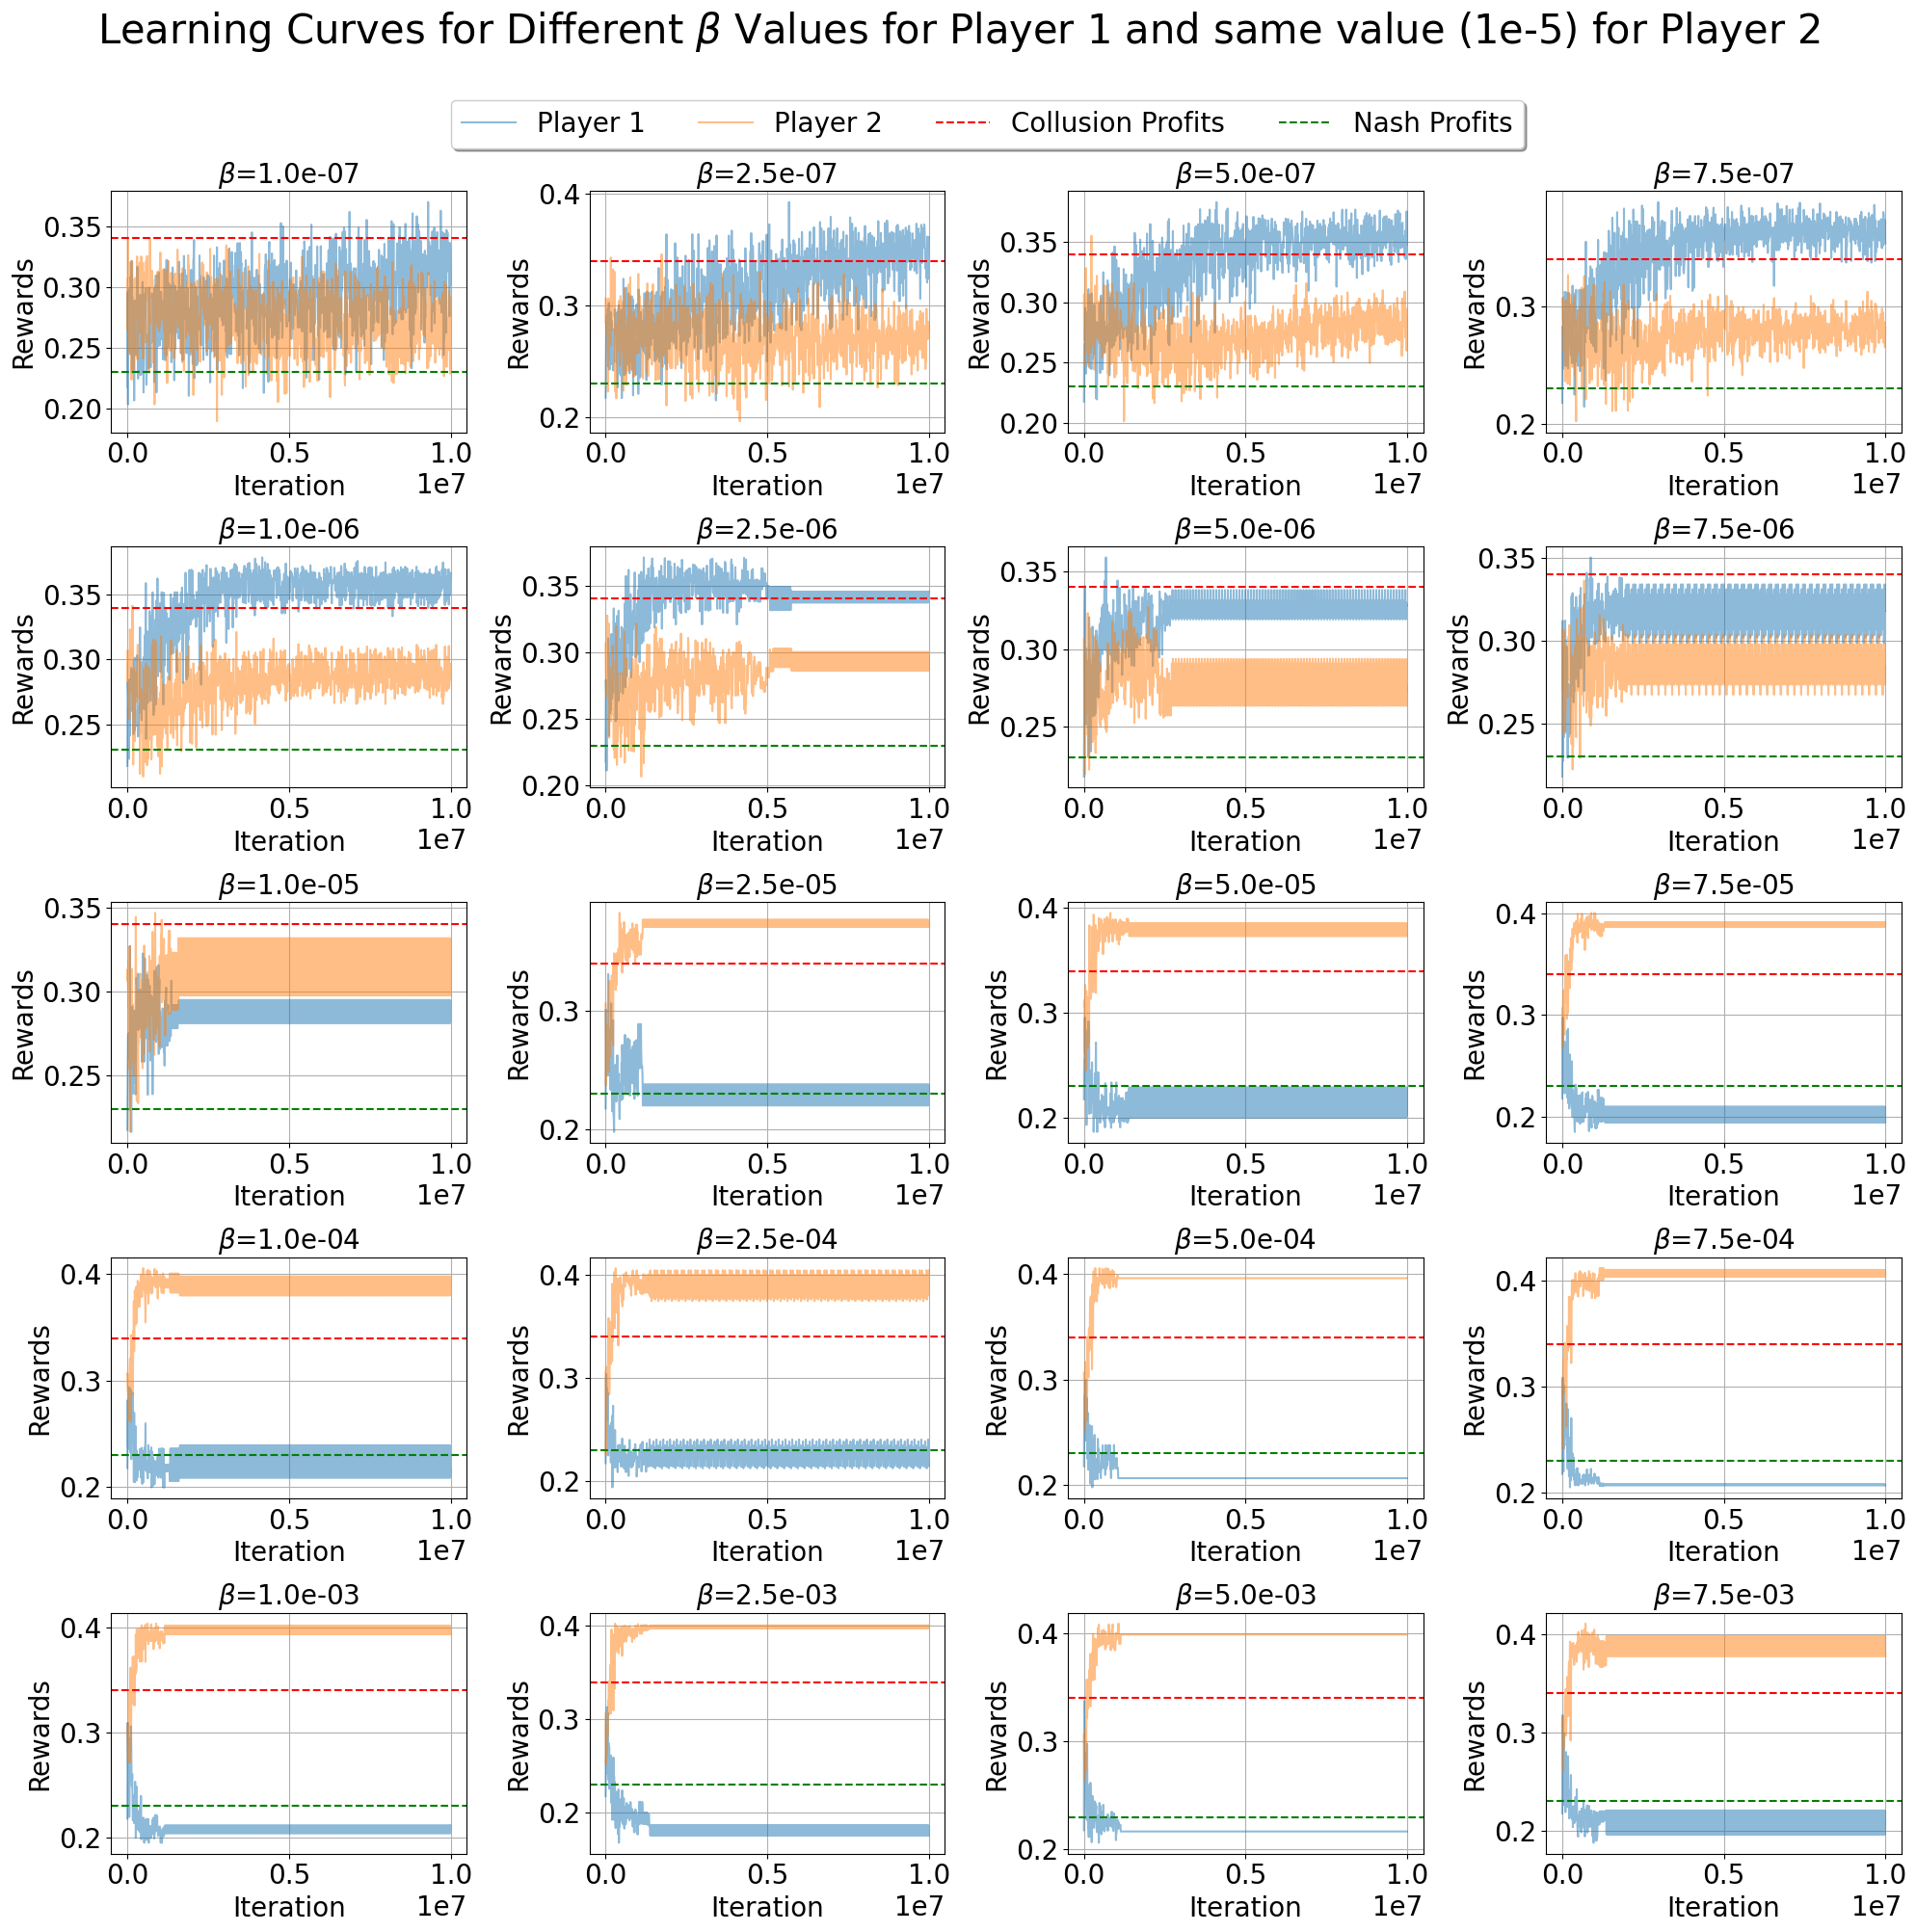

In [136]:
plot_learning_curves_subplots(lc_df_diff,10**7,sorted(df_same['beta'].unique()),5,4, title='Learning Curves for Different $\\beta$ Values for Player 1 and same value (1e-5) for Player 2')

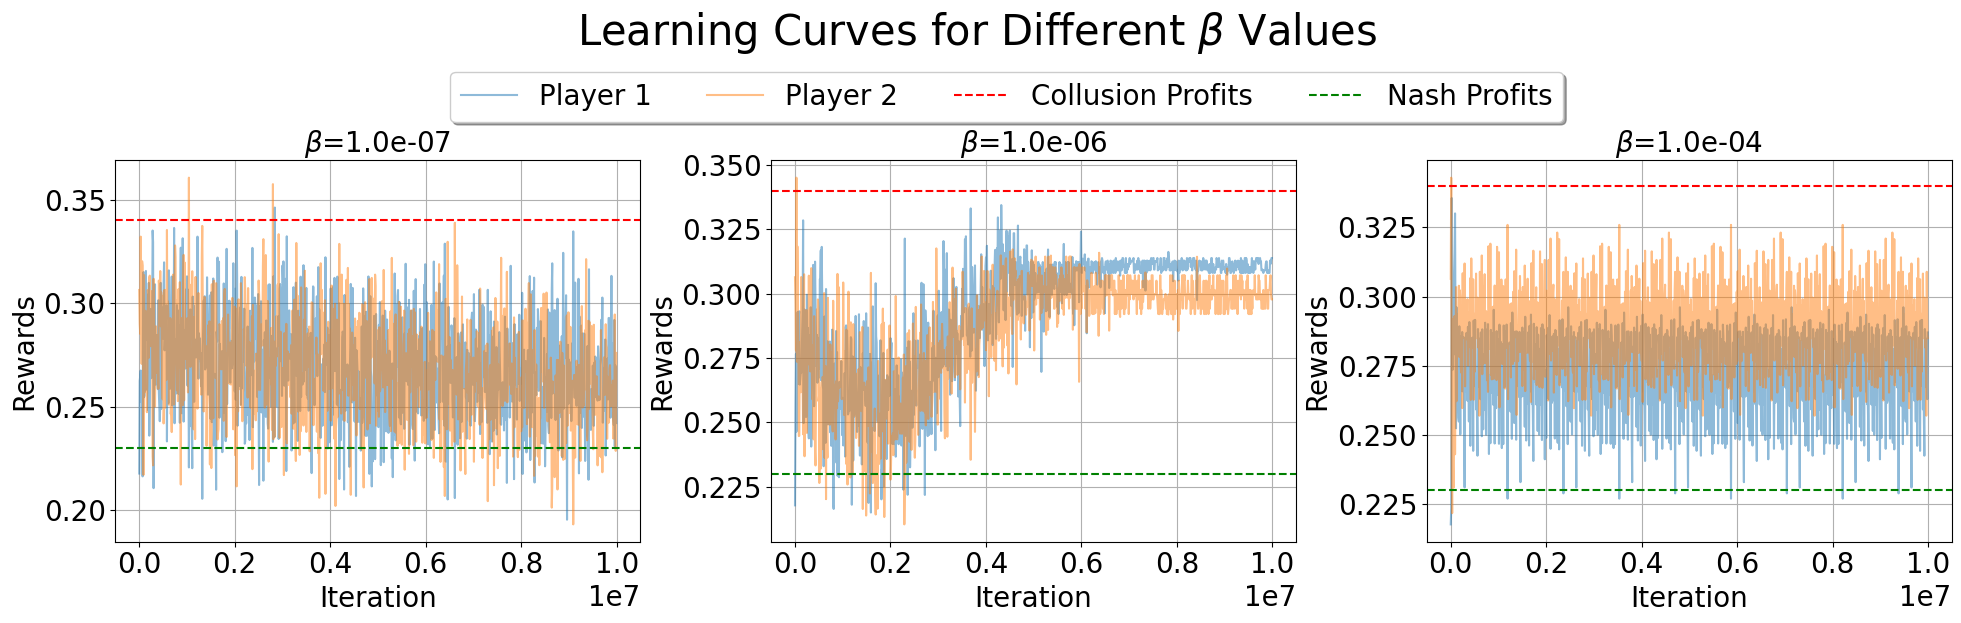

In [134]:
plot_learning_curves_subplots(lc_df_same,10**7,[1e-07,1e-06,0.0001],1,3, figl=20, figh=6, loc_leg=(0.8,0.95),y=1.03)

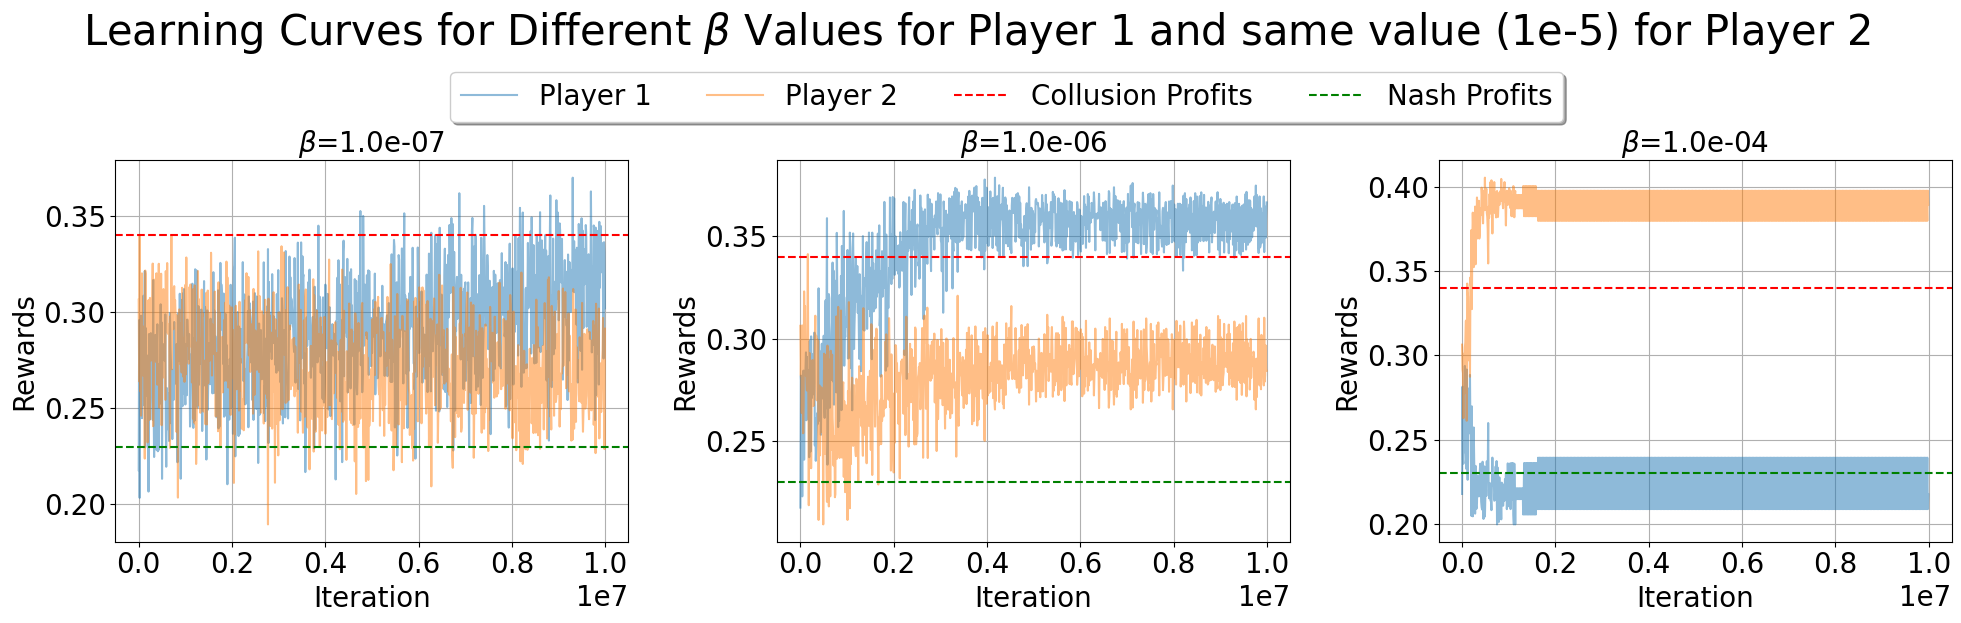

In [135]:
plot_learning_curves_subplots(lc_df_diff,10**7,[1e-07,1e-06,0.0001],1,3, figl=20, figh=6, loc_leg=(0.8,0.95),y=1.03, title='Learning Curves for Different $\\beta$ Values for Player 1 and same value (1e-5) for Player 2')

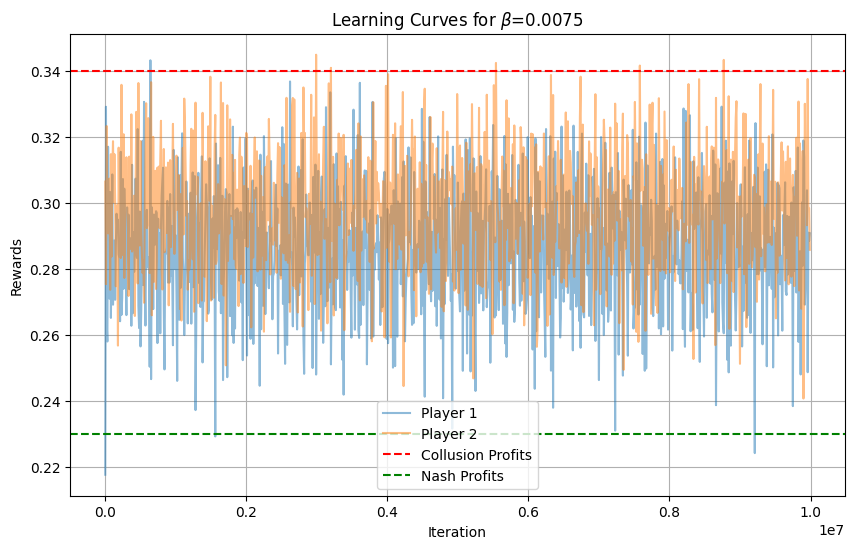

In [115]:
plot_learning_curve(lc_df_same, (10**(7)), beta)

In [ ]:
for beta in sorted(df_same['beta'].unique()):
    plot_learning_curve(lc_df_diff, (10**(7)), beta)

## 3- Final rewards and prices as a function of beta

In [14]:
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])

    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()

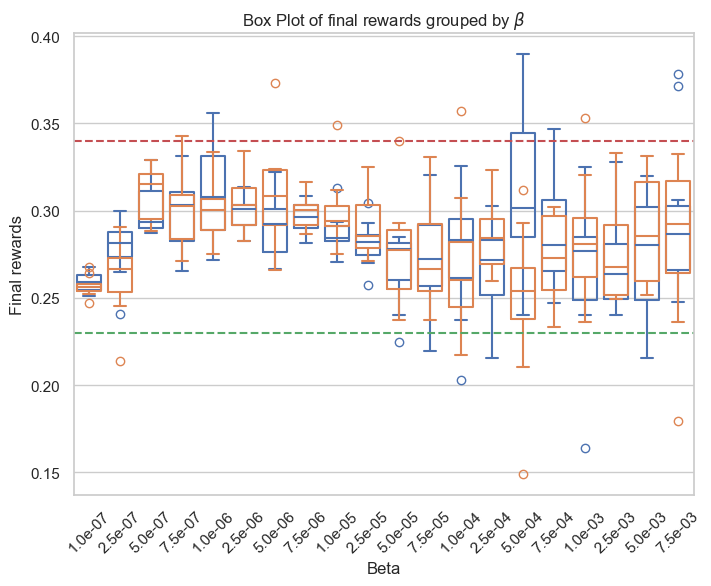

In [15]:
repart_rewards(fin_df_same)

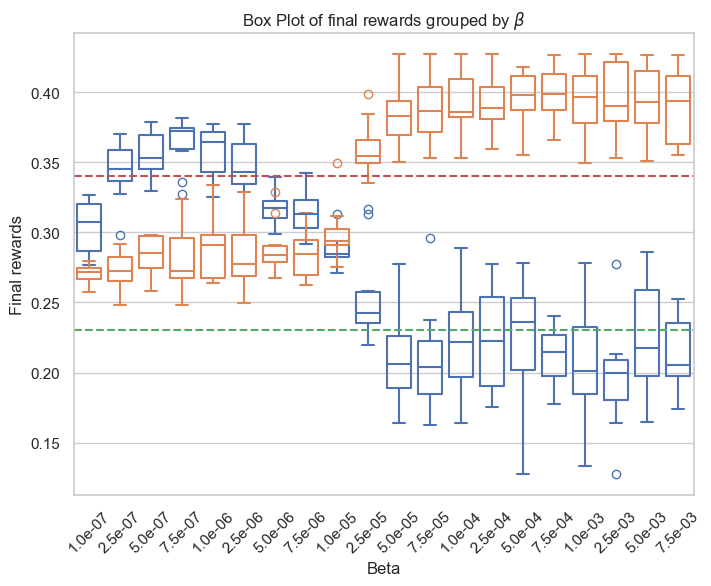

In [16]:
repart_rewards(fin_df_diff)

## Have a look on what punishement is really 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#.py
from core import qlearning2 as q
from core import best_response_grid as br

In [1]:
def after_training_react_inc(Q_table_player1, Q_table_player2, nb_sim=15):
    agents = [q.Agent() for _ in range(2)]
    env = q.Env()
    agents[0].Q = Q_table_player1
    agents[1].Q = Q_table_player2

    game_rewards = []

    rewards = []  # Store rewards for each game simulation step
    prices = []
    
    # Game simulation
    for t in range(nb_sim):  # Change the number of steps if necessary
        if t == 9: 
            # Agents' actions (deterministic policy)
            agents[0].a_ind = agents[0].Q[:, agents[0].s_ind].argmax() # This changes, we no longer use epsilon-greedy 
            agents[1].a_ind = agents[1].m - 1 #increases its price
            
            # Next state and reward
            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            prices.append(price)
            
            # Update state for the next step
            s_t = s_t1
            for agent in agents:
                agent.s_t = s_t
            s_ind1 = agents[0].find_index(s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1
        
            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
            
        else:
            # Agents' actions (deterministic policy)
            for agent in agents:
                agent.a_ind = agent.Q[:, agent.s_ind].argmax() # This changes, we no longer use epsilon-greedy 
            
            # Next state and reward
            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            prices.append(price)
            
            # Update state for the next step
            s_t = s_t1
            for agent in agents:
                agent.s_t = s_t
            s_ind1 = agents[0].find_index(s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1
        
            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
        

    print(f"Rewards: {rewards}")
    print(f"Prices: {prices}")

    non_dev_p = []
    dev_p = []
    for i in range(len(prices)):
        non_dev_p.append(prices[i][0])
        dev_p.append(prices[i][1])
    plt.plot(range(len(prices)),non_dev_p, label=f"Non-Deviating agent", marker='^',alpha=0.5)
    plt.plot(range(len(prices)), dev_p, label=f"Deviating agent", marker='s', alpha=0.5)

    plt.xlabel("Iterations")
    plt.ylabel("Prices")
    plt.title("Prices as function of time")
    plt.legend()
    plt.show()

In [2]:
def after_training_react_dec(Q_table_player1, Q_table_player2, nb_sim=15):
    agents = [q.Agent() for _ in range(2)]
    env = q.Env()
    agents[0].Q = Q_table_player1
    agents[1].Q = Q_table_player2

    rewards = []  # Store rewards for each game simulation step
    prices = []
    
    # Game simulation
    for t in range(nb_sim):  # Change the number of steps if necessary
        if t == 9: 
            # Agents' actions (deterministic policy)
            agents[0].a_ind = agents[0].Q[:, agents[0].s_ind].argmax() # This changes, we no longer use epsilon-greedy 
            agents[1].a_ind = 0 #decreases its price
            
            # Next state and reward
            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            prices.append(price)
            
            # Update state for the next step
            s_t = s_t1
            for agent in agents:
                agent.s_t = s_t
            s_ind1 = agents[0].find_index(s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1
        
            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
            
        else:
            # Agents' actions (deterministic policy)
            for agent in agents:
                agent.a_ind = agent.Q[:, agent.s_ind].argmax() # This changes, we no longer use epsilon-greedy 
            
            # Next state and reward
            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            prices.append(price)
            
            # Update state for the next step
            s_t = s_t1
            for agent in agents:
                agent.s_t = s_t
            s_ind1 = agents[0].find_index(s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1
        
            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
        

    print(f"Rewards: {rewards}")
    print(f"Prices: {prices}")

    non_dev_p = []
    dev_p = []
    for i in range(len(prices)):
        non_dev_p.append(prices[i][0])
        dev_p.append(prices[i][1])
    plt.plot(range(len(prices)),non_dev_p, label=f"Non-Deviating agent", marker='^',alpha=0.5)
    plt.plot(range(len(prices)), dev_p, label=f"Deviating agent", marker='s', alpha=0.5)

    plt.xlabel("Iterations")
    plt.ylabel("Prices")
    plt.title("Prices as function of time")
    plt.legend()
    plt.show()

In [4]:
import pandas as pd

In [5]:
Q_same = pd.read_csv('../final_data/Q_same_beta.csv')

In [6]:
Q_same

,0,1,2,3,4,5,6,7,8,9,...,217.1,218.1,219.1,220.1,221.1,222.1,223.1,224.1,beta,index
0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0010,1
1,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0010,1
2,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0010,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0010,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.363523,-0.314917,0.083143,-0.068194,0.458695,0.139167,0.614597,0.214128,-0.066099,0.038896,...,-0.295491,1.406094,-0.042955,1.919710,0.438046,0.267429,-0.047663,0.412832,0.0005,10
5996,0.018550,0.668567,-0.173768,-0.121266,-0.160849,0.117263,-0.162089,-0.192474,0.035885,0.280971,...,-0.193118,0.108219,-0.489544,0.066734,0.178763,0.223807,0.088291,0.135746,0.0005,10
5997,0.029223,-0.154722,-0.210182,-0.125954,0.436552,-0.466599,-0.207884,-0.357700,0.175068,0.029627,...,-0.032696,0.039714,-0.319784,0.308702,0.531065,0.292885,0.294066,-0.466954,0.0005,10
5998,0.331181,-0.038732,-0.364777,0.225637,-0.452211,-0.303754,0.197294,0.164794,0.324863,-0.200213,...,0.283571,0.530875,0.013969,0.027559,-0.154150,0.260870,0.339563,0.308407,0.0005,10
